# Data Exploration

In [1]:
import pandas as pd
import numpy as np

credit_path = "/Users/wangyingtou/Downloads/credit_record.csv"
credit_df = pd.read_csv(credit_path)

# Display the first few rows of the dataset
print(credit_df.head())
print(credit_df.info())

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None


Note:

From the data source we could know the meaning of each status,                               0: 1-29 days past due 
1: 30-59 days past due 
2: 60-89 days overdue 
3: 90-119 days overdue 
4: 120-149 days overdue 
5: Overdue or bad debts, write-offs for more than 150 days 
C: paid off that month 
X: No loan for the month

In [2]:
app_path = "/Users/wangyingtou/Downloads/application_record.csv"
app_df = pd.read_csv(app_path)

# Display the first few rows of the dataset
print(app_df.head())
print(app_df.info())
print(app_df.nunique())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

From the data source, we could understand that for DAY BIRTH, it's counting backwards from current day (0), -1 means yesterday and for DAYS_EMPLOYED, it's counting backwards from current day(0). If positive, it means the person currently unemployed.

# Data Cleaning

The application_record dataset have 438,557 observations regarding the personal and financial information of the bank's customers. Each row represents a specific bank customer, that must have an unique ID number, and contains 17 different information about them.

In [3]:
# Find out the number of duplicated ID
duplicated_ID = app_df.duplicated(subset='ID', keep="first")
print('There are',sum(duplicated_ID),'duplicates in ID column.')

There are 47 duplicates in ID column.


We can find there are 94 duplicated IDs that are not unique in the application_record dataframe. To prevent confusion, we decide to drop those duplicated ID record

In [4]:
#drop duplicate IDs and double check if the number is equal to 438,557 - 94 = 438,463
app_df = app_df.drop_duplicates(subset = 'ID', keep = False)
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   CODE_GENDER          438463 non-null  object 
 2   FLAG_OWN_CAR         438463 non-null  object 
 3   FLAG_OWN_REALTY      438463 non-null  object 
 4   CNT_CHILDREN         438463 non-null  int64  
 5   AMT_INCOME_TOTAL     438463 non-null  float64
 6   NAME_INCOME_TYPE     438463 non-null  object 
 7   NAME_EDUCATION_TYPE  438463 non-null  object 
 8   NAME_FAMILY_STATUS   438463 non-null  object 
 9   NAME_HOUSING_TYPE    438463 non-null  object 
 10  DAYS_BIRTH           438463 non-null  int64  
 11  DAYS_EMPLOYED        438463 non-null  int64  
 12  FLAG_MOBIL           438463 non-null  int64  
 13  FLAG_WORK_PHONE      438463 non-null  int64  
 14  FLAG_PHONE           438463 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
print("unique ID count in credit record:", credit_df["ID"].nunique())
print("unique ID count in application record:", app_df["ID"].nunique())

unique ID count in credit record: 45985
unique ID count in application record: 438463


From unique ID count we can find that the application record dataset containts more IDs than the credit_record dataset, to only look at unique IDs that are consistent between both datasets, we decide to pick out the common IDs in both table to do following analysis

In [6]:
df = app_df.merge(credit_df, how='inner', on=['ID'])
print("unique ID count in new df:", df["ID"].nunique())
df.head()

unique ID count in new df: 36457


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [7]:
# checking if drop duplicate successfully
df[df.duplicated()].size 

0

In [8]:
num_rows, num_columns = df.shape
print(f"The dataframe has {num_rows} rows and {num_columns} columns.")

The dataframe has 777715 rows and 20 columns.


In [9]:
# checking missing values
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

OCCUPATION_TYPE    240048
dtype: int64


In [10]:
# Check all the unique values in occupation type
df['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

OCCUPATION_TYPE is not useful for the modeling and it will be dropped later

# Feature Engineering

In [11]:
from datetime import date,datetime, timedelta
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install imbalanced-learn 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [12]:
def calc_day_of_birth (day_num):
    today = date.today() 
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay
def calculate_age(born):
    born = datetime.datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

#get the day of birth for each person   
df['BIRTH_DAY']   = df['DAYS_BIRTH'].apply(calc_day_of_birth) 
#calculate age (Feature Engineering)
df['AGE'] = df['BIRTH_DAY'].apply(calculate_age) 

#Change Days_employed 
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x > 0 else 0)

In [13]:
#mark omited customers with a -1, denied customers with a 0, and approved customers with a 1
def determine_approval(df):
    if(df['STATUS'] == 'X'): return 0
    elif(df['STATUS'] == '1' or df['STATUS'] == '2' or df['STATUS'] == '3' or df['STATUS'] == '4' or df['STATUS'] == '5'): return 0
    elif(df['STATUS'] == 'C' or df['STATUS'] == '0'): return 1

In [14]:
#create an approved series 
df['APPROVED'] = df.apply(determine_approval, axis=1)
print(df.head())

#remove those with an X as a status that we want to omit
print(df['STATUS'].value_counts())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  ...  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
0  Rented apartment  ...                1

In [15]:
#drop un nessesary columns
df = df.drop(['ID','DAYS_BIRTH','MONTHS_BALANCE','OCCUPATION_TYPE','BIRTH_DAY','STATUS',"FLAG_MOBIL"],axis=1)
#flag_mobile is all 1, only contain one value so we drop it

In [16]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,APPROVED
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,1,0,0,2.0,32,1
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,1,0,0,2.0,32,1
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,1,0,0,2.0,32,1
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,1,0,0,2.0,32,1
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,1,0,0,2.0,32,1


In [17]:
num_rows, num_columns = df.shape
print(f"The dataframe has {num_rows} rows and {num_columns} columns.")

The dataframe has 777715 rows and 16 columns.


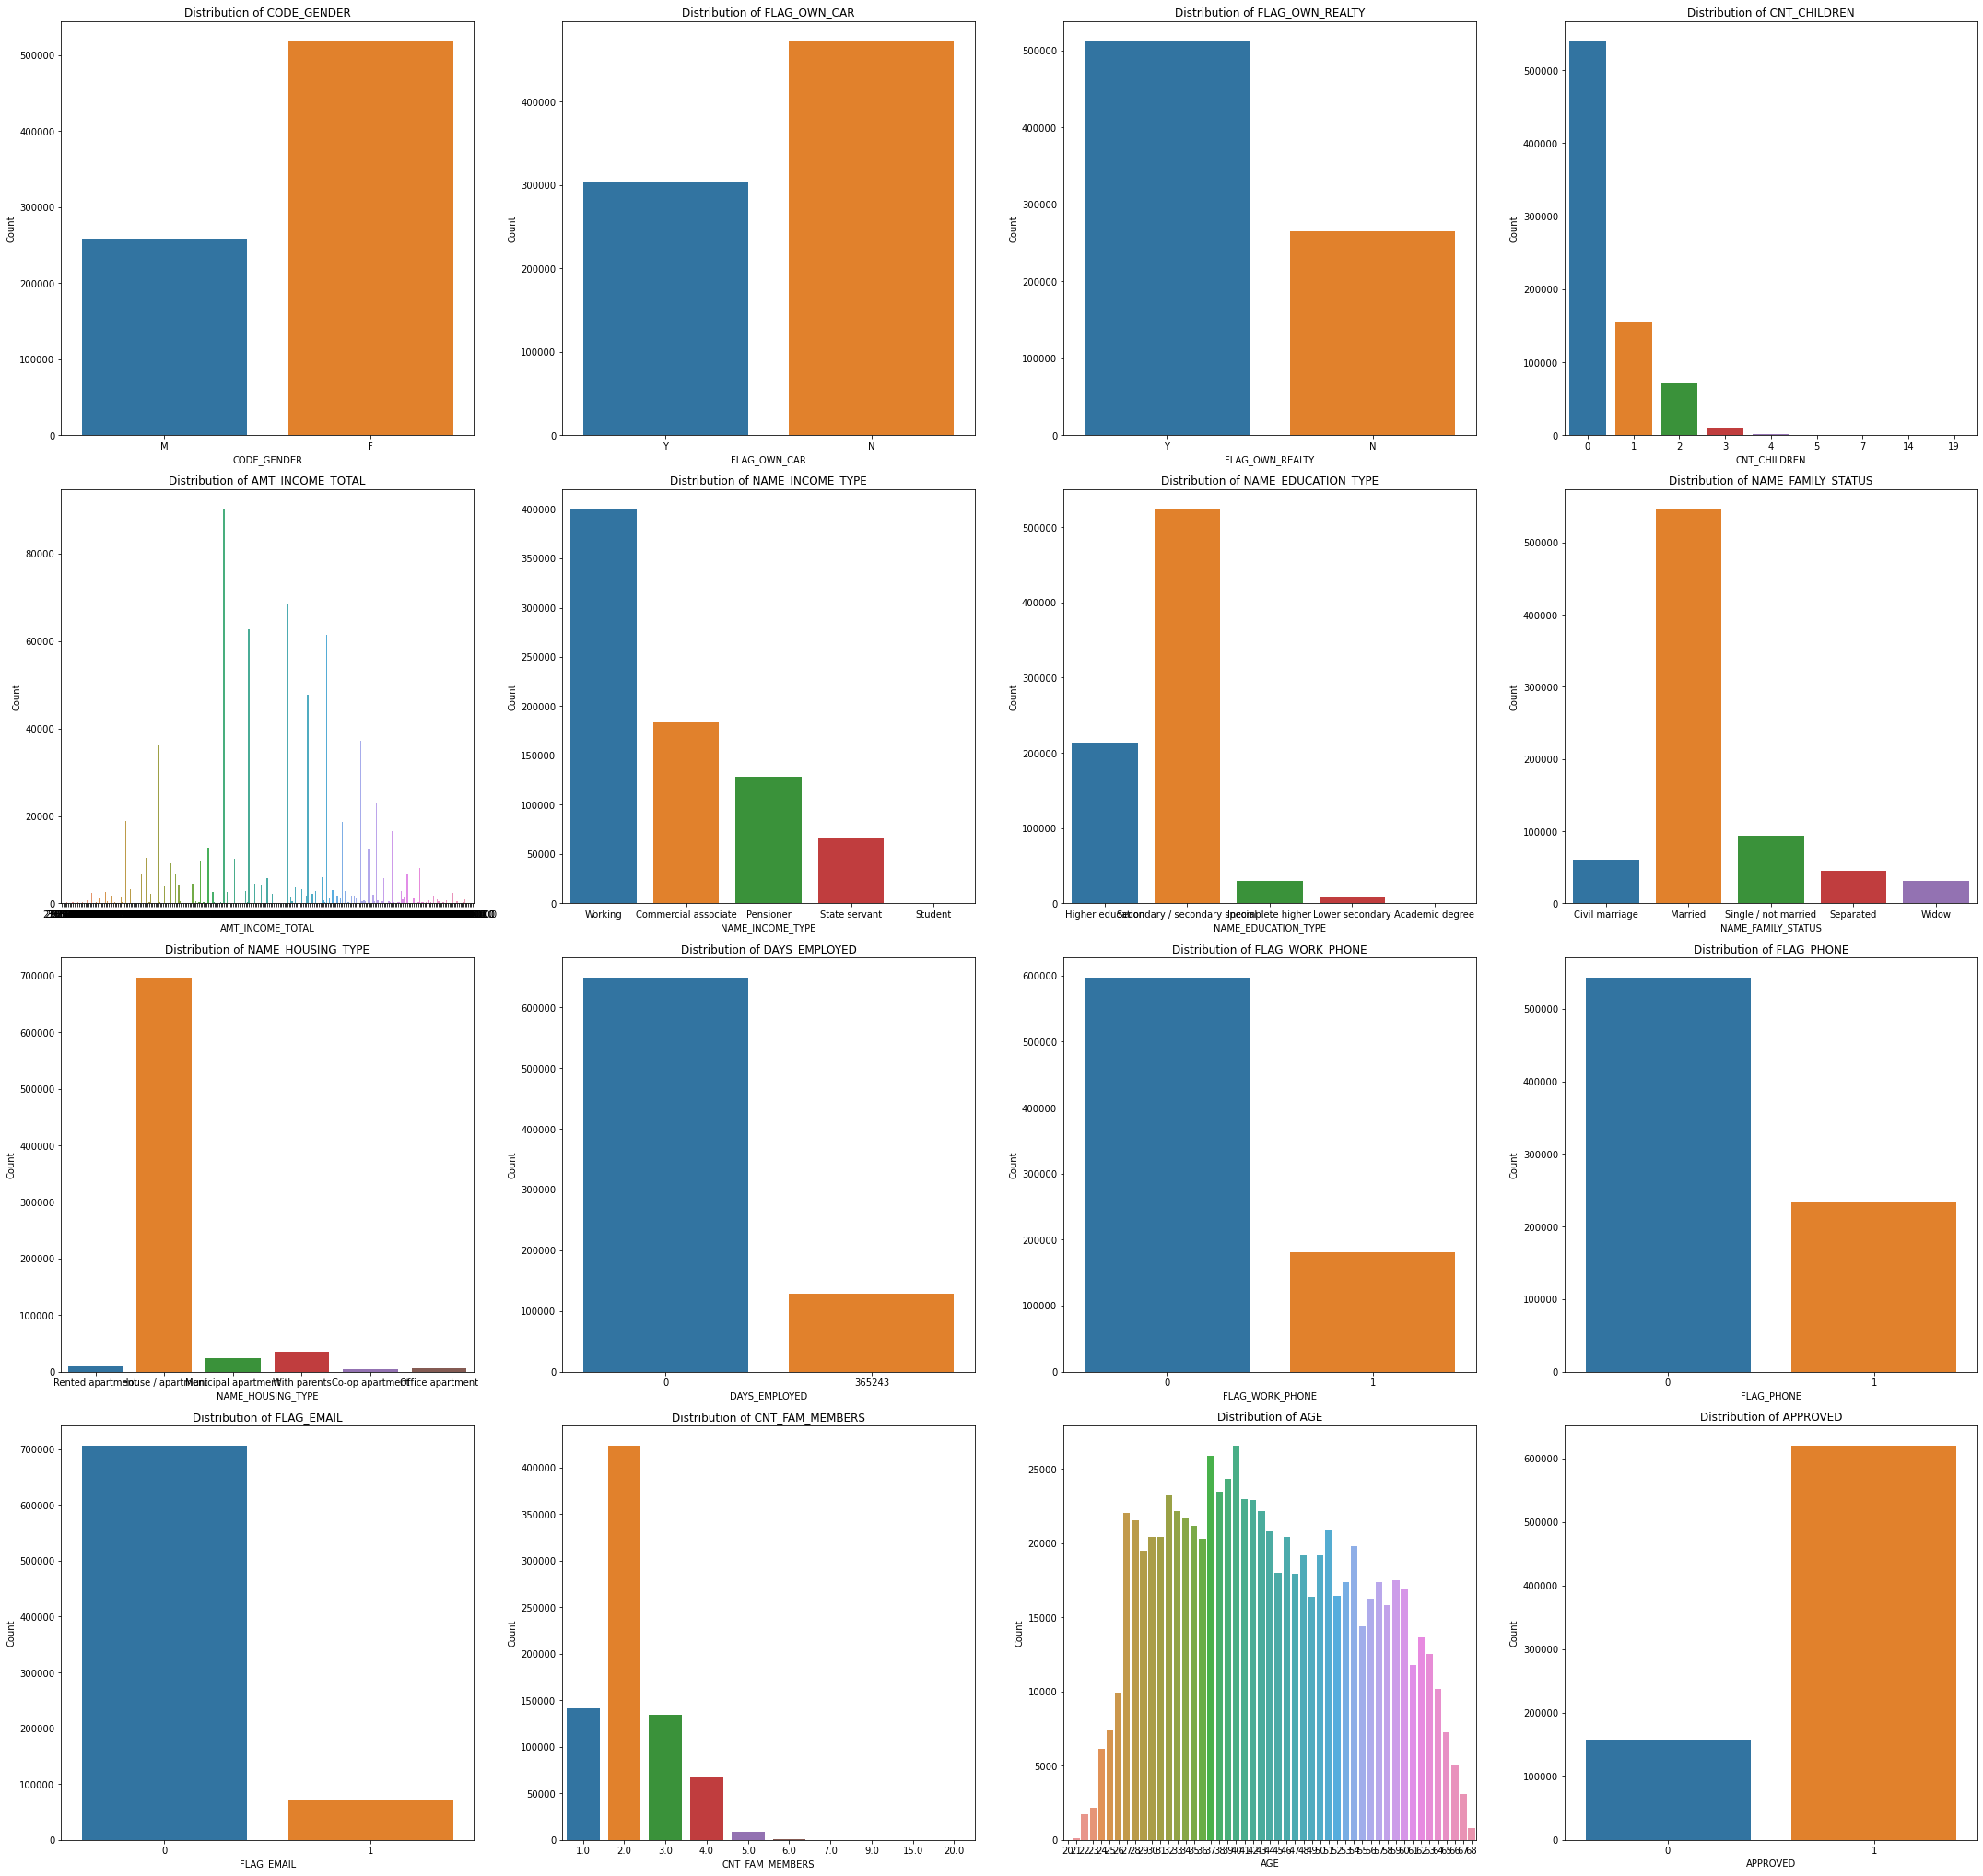

In [18]:
#Bar Plots for Features
import matplotlib.pyplot as plt
import seaborn as sns

# List of binary columns
binary_cols = list(df.columns[:])

# Set up the matplotlib figure
fig, axes = plt.subplots(5, 4, figsize=(30,35))

# Flatten the axes array and remove extra subplots
axes = axes.flatten()
[ax.set_visible(False) for ax in axes[len(binary_cols):]]

# Plot bar plots for each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

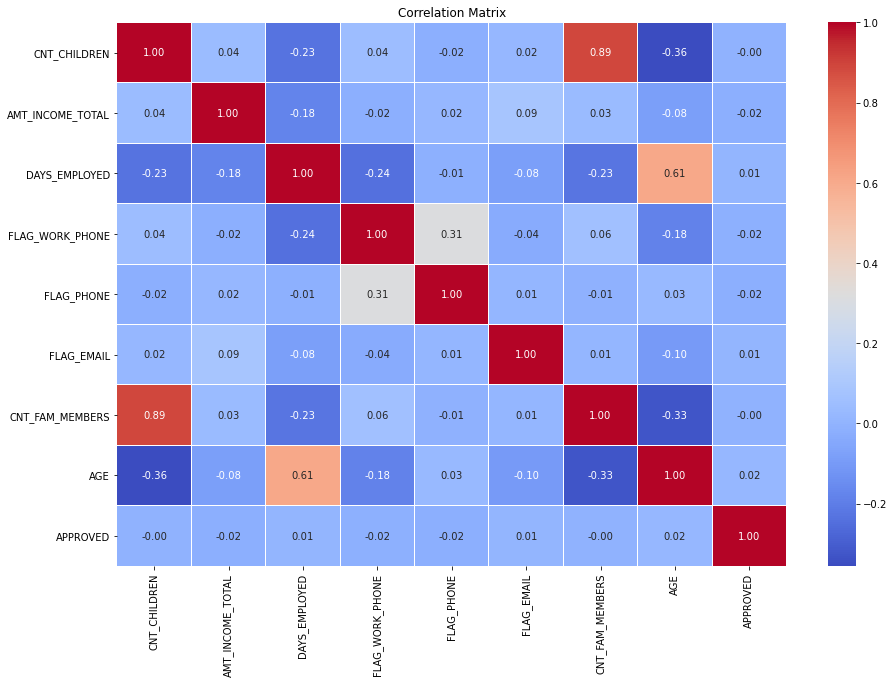

In [19]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.05)

plt.title('Correlation Matrix')
plt.show()

# Encode the Data

In [20]:
print("columns in credit data")
print("--")
cat_credit_data = [i for i in df.select_dtypes(include=np.object).columns]
num_credit_data = [i for i in df.select_dtypes(include=np.number).columns]
print("categorical columns:",cat_credit_data)
print("----")
print("numerical columns:",num_credit_data)

columns in credit data
--
categorical columns: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
----
numerical columns: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE', 'APPROVED']


In [21]:
from sklearn import preprocessing

# start label enncoder
column_data = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]
for col in column_data:
    label = preprocessing.LabelEncoder()
    df[col] = label.fit_transform(df[col].values)

df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,APPROVED
0,1,1,1,0,427500.0,4,1,0,4,0,1,0,0,2.0,32,1
1,1,1,1,0,427500.0,4,1,0,4,0,1,0,0,2.0,32,1
2,1,1,1,0,427500.0,4,1,0,4,0,1,0,0,2.0,32,1
3,1,1,1,0,427500.0,4,1,0,4,0,1,0,0,2.0,32,1
4,1,1,1,0,427500.0,4,1,0,4,0,1,0,0,2.0,32,1


# Check Imbalance Data 

In [22]:
df['APPROVED'].value_counts(normalize=True) 

1    0.797452
0    0.202548
Name: APPROVED, dtype: float64

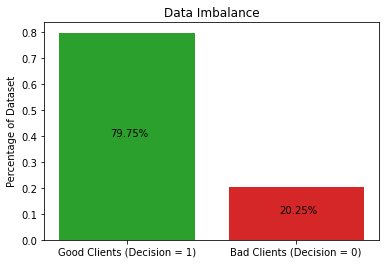

In [23]:
fig, ax = plt.subplots()

client = ['Good Clients (Decision = 1)','Bad Clients (Decision = 0)']
proportions = df['APPROVED'].value_counts(normalize=True)
bar_colors = ['tab:green','tab:red']

ax.bar(client, proportions, color=bar_colors)

ax.set_ylabel('Percentage of Dataset')
ax.set_title('Data Imbalance')

ax.text(0-0.1, proportions[1]/2, '{:.2%}'.format(proportions[1]), size=10)
ax.text(1-0.1,proportions[0]/2, '{:.2%}'.format(proportions[0]), size=10)

fig.show()

Data is very imbalanced, thus we need to use undersampling

# Undersampling to Balance the Data

In [24]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model 
from sklearn import neighbors
from sklearn.model_selection import KFold

X = df.drop(['APPROVED'], axis=1)  # Dropping the identifier and the target variable
y = df['APPROVED']

#Spilit the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3,random_state=42,stratify=y) 

In [25]:
print('Original dataset shape %s' % Counter(y))

ros = RandomUnderSampler(random_state=42,
                         sampling_strategy=0.6) 
X_train, y_train = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train))

Original dataset shape Counter({1: 620190, 0: 157525})
Resampled dataset shape Counter({1: 183778, 0: 110267})


In [26]:
# Instantiate StandardScaler and fitting it
sc = StandardScaler() 
X_scaled = sc.fit_transform(X)  # Scale the entire dataset before cross-validation
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test) 

In [27]:
#Cross Validation to assess the generalization of the logistic regression

clf_lr = linear_model.LogisticRegression(multi_class='auto', C=1, max_iter=1000) #fit this model to all the data
scores_f1 = cross_val_score(clf_lr, X_train_std, y_train, cv=10, scoring='f1')
print("F1-score (with cross-validation): %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2)) 

F1-score (with cross-validation): 0.77 (+/- 0.00)


In [28]:
#Cross Validation to assess the generalization of the K-nn
knn = neighbors.KNeighborsClassifier(n_neighbors=3,
                                     p=2,
                                     metric='minkowski',
                                     n_jobs=-1,
                                     weights='uniform')
scores_f1 = cross_val_score(knn, X_train_std, y_train, cv=10, scoring='f1')
print("F1-score (with cross-validation): %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2)) 

F1-score (with cross-validation): 0.42 (+/- 0.01)


In [29]:
#Cross Validation to assess the generalization of the decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
scores_f1 = cross_val_score(tree, X_train, y_train, cv=10, scoring='f1')
print("F1-score (with cross-validation): %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2)) 

F1-score (with cross-validation): 0.83 (+/- 0.00)


Decision Tree has the best general performance

# Hyparperameter Tuning for Decision Tree

In [30]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer 

inner_cv = KFold(n_splits=5, shuffle=True) # inner cross-validation folds
outer_cv = KFold(n_splits=5, shuffle=True) # outer cross-validation folds

scoring = make_scorer(f1_score)

param_grid_dt = {
    "criterion": ['gini', 'entropy'],
    'max_depth': range(1,20),
    'min_samples_leaf': [5,10,15,20]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=inner_cv, scoring=scoring)
grid_search_dt.fit(X_train, y_train)
#estimate generalization performance (outer cross-validation)
nested_score_gs = cross_val_score(grid_search_dt, X=X_train, y=y_train, cv=outer_cv) 

print("Decision Tree - Optimal Parameters:", grid_search_dt.best_params_, "F1 Score:", grid_search_dt.best_score_)
print("Decision Tree - Nested CV Accuracy : ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())
print('')

Decision Tree - Optimal Parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 5} F1 Score: 0.8138532173416836
Decision Tree - Nested CV Accuracy :  0.8141850996990169  +/-  0.0020559051063876537



# Use Decision Tree to Model the Data

In [31]:
tree = DecisionTreeClassifier(random_state=42,criterion = "gini", max_depth = 19, min_samples_leaf = 5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)  # generate classification prediction
print("F1 score:", f1_score(y_test, y_pred_tree))

F1 score: 0.8765066160094326


# Plot the ROC Curve for Decision Tree Model

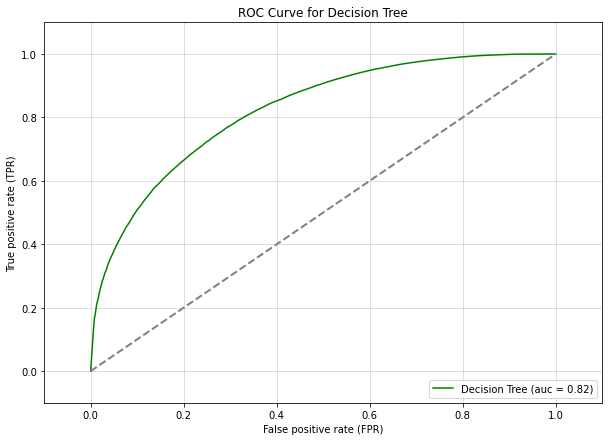

In [32]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=19, min_samples_leaf=5)
tree.fit(X_train, y_train)

# Predict the probabilities using the Decision Tree
y_pred_tree_prob = tree.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for the Decision Tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree_prob)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot the ROC curve for the Decision Tree
plt.figure(figsize=(10, 7))
plt.plot(fpr_tree, tpr_tree, color='green', linestyle='-', label='Decision Tree (auc = %0.2f)' % roc_auc_tree)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('ROC Curve for Decision Tree')
plt.show()

#  Confusion Matrix of Decision Tree Model

Normalized confusion matrix
[[0.83333333 0.16666667]
 [0.125      0.875     ]]


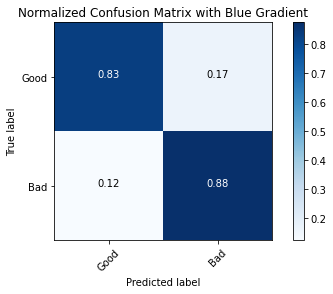

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_blue(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  # Changed to Blues colormap
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# define cnf_matrix 
cnf_matrix = np.array([[50, 10], [5, 35]])
# Display the confusion matrix with blue gradient
plt.figure()
plot_confusion_matrix_blue(cnf_matrix, classes=['Good', 'Bad'], normalize=True,
                           title='Normalized Confusion Matrix with Blue Gradient')
plt.show()